In [1]:
setwd("/Users/aryamanbahl/Desktop/IIITH/Research/Metabrick_RRBS/analysis_files")
getwd()
source("metabric_rrbs/scripts/utils.R", encoding = "latin1")

[1] "/Users/aryamanbahl/Desktop/IIITH/Research/Metabrick_RRBS/analysis_files"

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

install.packages("dplyr")
install.packages("data.table")
install.packages("readxl")
BiocManager::install("impute")
installed.packages("limma")
BiocManager::install("DESeq2")


The downloaded binary packages are in
	/var/folders/1j/6n9mdv5j1zv3pd80zp_xh8mr0000gn/T//RtmpkY5WT3/downloaded_packages

The downloaded binary packages are in
	/var/folders/1j/6n9mdv5j1zv3pd80zp_xh8mr0000gn/T//RtmpkY5WT3/downloaded_packages

The downloaded binary packages are in
	/var/folders/1j/6n9mdv5j1zv3pd80zp_xh8mr0000gn/T//RtmpkY5WT3/downloaded_packages


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'impute'”
Old packages: 'BiocParallel', 'broom', 'cli', 'cluster', 'collections',
  'commonmark', 'curl', 'diffobj', 'doBy', 'docopt', 'doFuture', 'doRNG',
  'fastcluster', 'foreign', 'fs', 'future', 'gclus', 'gdtools', 'generics',
  'gert', 'ggplot2', 'gh', 'globals', 'httpuv', 'httr2', 'hunspell', 'jpeg',
  'jsonlite', 'KMsurv', 'knitr', 'later', 'lattice', 'lme4', 'magick',
  'markdown', 'MatrixModels', 'maxstat', 'mgcv', 'mime', 'miniUI', 'nlme',
  'nloptr', 'officer', 'openssl', 'parallelly', 'pbdZMQ', 'pbkrtest', 'pillar',
  'pkgbuild', 'pkgdown', 'prodlim', 'ps', 'R.cache', 'R.oo', 'ragg',
  

Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,Archs,MD5sum,NeedsCompilation,Built


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'DESeq2'




The downloaded binary packages are in
	/var/folders/1j/6n9mdv5j1zv3pd80zp_xh8mr0000gn/T//RtmpkY5WT3/downloaded_packages


Old packages: 'BiocParallel', 'broom', 'cli', 'cluster', 'collections',
  'commonmark', 'curl', 'diffobj', 'doBy', 'docopt', 'doFuture', 'doRNG',
  'fastcluster', 'foreign', 'fs', 'future', 'gclus', 'gdtools', 'generics',
  'gert', 'ggplot2', 'gh', 'globals', 'httpuv', 'httr2', 'hunspell', 'jpeg',
  'jsonlite', 'KMsurv', 'knitr', 'later', 'lattice', 'lme4', 'magick',
  'markdown', 'MatrixModels', 'maxstat', 'mgcv', 'mime', 'miniUI', 'nlme',
  'nloptr', 'officer', 'openssl', 'parallelly', 'pbdZMQ', 'pbkrtest', 'pillar',
  'pkgbuild', 'pkgdown', 'prodlim', 'ps', 'R.cache', 'R.oo', 'ragg',
  'RcppArmadillo', 'Rdpack', 'recipes', 'reformulas', 'reticulate', 'rlang',
  'RSQLite', 'rvg', 'sass', 'scales', 'sparsevctrs', 'stringi', 'systemfonts',
  'textshaping', 'tinytex', 'utf8', 'writexl', 'xfun', 'xml2', 'zip', 'zoo'



In [197]:
library(tidyverse)   # Data manipulation and visualization
library(data.table)  # Fast data handling
library(dplyr)       # Data wrangling (part of tidyverse)
library(readxl)      # Read Excel files
library(readr)       # Read CSV/TSV files
library(impute)      # Impute missing values 
library(limma)       # Differential expression/methylation analysis
library(DESeq2)      # Differential expression analysis for RNA-Seq data
library(ggrepel)     # For better text labels in ggplot2
library(ggplot2)     # Data visualization

## Sample data 

In [4]:
metadata <- read_excel("data/S1 - Sample Information.xlsx", sheet = "Sheet1")
dim(metadata)        
colnames(metadata)
head(metadata)        

[1] 1782   27

[1] "samp"              "patient"           "batch"            
 [4] "track"             "total_reads"       "mapped_reads"     
 [7] "mapped_frac"       "cg_num"            "meth_calls"       
[10] "global_avg_meth"   "type"              "age"              
[13] "grade"             "stage"             "ER"               
[16] "IHC"               "iC10"              "PAM50"            
[19] "matched_normal"    "matched_tumor"     "digpath_lymph"    
[22] "digpath_stromal"   "IMC_Fibroblasts"   "IMC_Lymphocytes"  
[25] "ASCAT_cellularity" "MathScore"         "log10_global_epm"

samp,patient,batch,track,total_reads,mapped_reads,mapped_frac,cg_num,meth_calls,global_avg_meth,⋯,PAM50,matched_normal,matched_tumor,digpath_lymph,digpath_stromal,IMC_Fibroblasts,IMC_Lymphocytes,ASCAT_cellularity,MathScore,log10_global_epm
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MB_0006,P2,b4,metabric_rrbs_new.BATCH4.SLX_10703.A004.C8107ANXX,16994775,14269780,0.8396569,4001519,55735755,0.5578358,⋯,LUMB,NA,NA,0.08118741,0.5749816,NA,NA,0.58,0.8236636,NA
MB_0028,P6,b1,metabric_rrbs_new.BATCH1.SLX_10132.A016.C6J71ANXX,12814856,11528115,0.8995899,4763459,45868097,0.6253500,⋯,LUMB,NA,NA,0.15468349,0.5017763,0.04735547,0.0104551050,0.69,0.6455982,4.190811
MB_0030,P7,b1,metabric_rrbs_new.BATCH1.SLX_10132.A018.C6J71ANXX,12366830,11114423,0.8987285,4464651,43879242,0.5822559,⋯,NA,NA,NA,0.13091014,0.5361913,0.48115298,0.0144124170,NA,NA,3.480036
MB_0035,P8,b4,metabric_rrbs_new.BATCH4.SLX_10702.A005.C8107ANXX,22283773,18670811,0.8378658,3977722,66980881,0.6533751,⋯,HER2,NA,NA,0.11840248,0.5022391,0.07276657,0.0000000000,0.51,0.3576067,NA
MB_0040,P9,b1,metabric_rrbs_new.BATCH1.SLX_10133.A015.C6J71ANXX,10309989,8842899,0.8577021,4305845,34669398,0.5911771,⋯,NA,NA,NA,0.21741995,0.5176772,0.67786068,0.0006218905,NA,0.1147223,3.609631
MB_0046,P11,b4,metabric_rrbs_new.BATCH4.SLX_10702.A016.C8107ANXX,16865163,14138471,0.8383240,3915679,52680191,0.5778299,⋯,LUMA,NA,NA,0.07668140,0.4993792,NA,NA,0.40,0.3057615,NA


In [5]:
table(metadata$type)
table(metadata$ER)
table(metadata$IHC)
table(metadata$PAM50)


ADJNORMAL    TUMOUR 
      244      1538 


negative   normal positive 
     350      244     1179 


ADJNORMAL  ER-HER2+  ER+HER2-  ER+HER2+      TNBC 
      244        59      1117        44       307 


ADJNORMAL     BASAL   CLAUDIN      HER2      LUMA      LUMB    NORMAL 
      244       144       139       174       500       340       115 

In [6]:
tumor_samples <- metadata %>% filter(type == "TUMOUR") %>% pull(samp)
normal_samples <- metadata %>% filter(type == "ADJNORMAL") %>% pull(samp)

length(tumor_samples)
length(normal_samples)

[1] 1538

[1] 244

In [8]:
tss_coords<-read_tsv("data/gene_tss.tsv")
head(tss_coords)

genes_annot <- read_csv("data/genes_annot.csv")
head(genes_annot)

Rows: 33241 Columns: 2
-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (1): full_name
dbl (1): tss

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


full_name,tss
<chr>,<dbl>
chr1.+.DDX11L1,11873
chr1.+.MIR1302-10,30365
chr1.+.MIR1302-11,30365
chr1.+.MIR1302-2,30365
chr1.+.MIR1302-9,30365
chr1.+.OR4F5,69090


Rows: 114 Columns: 4
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (3): gene, type, description
dbl (1): clust

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


gene,type,description,clust
<chr>,<chr>,<chr>,<dbl>
ZIC2,EMB_TF,NA,15
TMEM97,Extra,NA,15
NKX2-2,EMB_TF,NA,15
CBX2,PcG,NA,15
SIX4,EMB_TF,NA,15
GATA2,EMB_TF,NA,15


### Methylation data 

In [93]:
prom_meth <- read_csv("data/promoter_avg_meth_filt.csv")
prom_meth <- prom_meth %>% select(-name3.chr)
dim(prom_meth)
head(prom_meth)

Rows: 15793 Columns: 1787
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr    (3): chrom, name, name3.chr
dbl (1784): start, end, MB_0006, MB_0028, MB_0030, MB_0035, MB_0040, MB_0046...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 15793  1786

chrom,start,end,name,MB_0006,MB_0028,MB_0030,MB_0035,MB_0040,MB_0046,⋯,MB_7281,MB_7283,MB_7285,MB_7288,MB_7289,MB_7291,MB_7292,MB_7293,MB_7296,MB_7298
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,762469,763020,LINC01128,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.01829268,NA,0.000000000,0.000000000,0.00000000,0.00000000,0.006849315,NA,0.000000000
chr1,762676,763227,LINC01128,0.021929825,0.03018109,0.07858546,0.00000000,0.01627486,0.21922626,⋯,0.02374169,0.17092338,0.01785714,0.000000000,0.066974596,0.00000000,0.11016949,0.042925278,0.01030928,0.062780269
chr1,860619,861170,SAMD11,0.001870324,0.01188300,0.01046622,0.15767196,0.01549464,0.05299539,⋯,0.01910480,0.00802139,0.02392344,0.002307692,0.002057613,0.01895375,0.02185792,0.000000000,0.00000000,0.006283229
chr1,895465,896016,KLHL17,0.014367816,0.04901961,0.04769737,0.03629032,0.03182580,0.06606607,⋯,0.03778802,0.04700855,0.11333333,0.004689332,0.030204962,0.02810651,0.14285714,0.026392962,0.09826590,0.058666667
chr1,901375,901926,PLEKHN1,0.024253731,0.05357143,0.02334630,0.01470588,0.01798561,0.00000000,⋯,0.10212766,0.04149378,0.01369863,0.000000000,0.015873016,0.07216495,0.07185629,0.021526419,0.00000000,0.029490617
chr1,948345,948896,ISG15,0.000000000,0.00000000,0.00000000,0.02083333,0.00000000,0.00000000,⋯,0.00000000,0.02439024,0.00000000,0.009523810,0.010309278,0.00000000,0.00000000,0.000000000,0.00000000,0.000000000


In [94]:
# Averaging out methylation values for each gene to keep on value for each gene
prom_meth_clean <- prom_meth %>%
  select(-start, -end) %>%
  group_by(name) %>%
  summarise(across(everything(), mean, na.rm = TRUE)) %>%
  ungroup()

meth_matrix <- prom_meth_clean %>%
  column_to_rownames("name") %>%
  as.matrix()

# Remove samples with >80% missing values
meth_matrix_filtered <- meth_matrix[, colMeans(is.na(meth_matrix)) <= 0.8]

# Now run imputation
imputed <- impute.knn(meth_matrix_filtered, k = 5)


Warning message:
“There were 13552 warnings in `summarise()`.
The first warning was:
ℹ In argument: `across(everything(), mean, na.rm = TRUE)`.
ℹ In group 1: `name = "A2M-AS1"`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 13551 remaining warnings.”


Cluster size 13552 broken into 11797 1755 
Cluster size 11797 broken into 1793 10004 
Cluster size 1793 broken into 754 1039 
Done cluster 754 
Done cluster 1039 
Done cluster 1793 
Cluster size 10004 broken into 1513 8491 
Cluster size 1513 broken into 537 976 
Done cluster 537 
Done cluster 976 
Done cluster 1513 
Cluster size 8491 broken into 7111 1380 
Cluster size 7111 broken into 272 6839 
Done cluster 272 
Cluster size 6839 broken into 5123 1716 
Cluster size 5123 broken into 5064 59 
Cluster size 5064 broken into 5060 4 
Cluster size 5060 broken into 5056 4 
Cluster size 5056 broken into 1 5055 
Done cluster 1 
Cluster size 5055 broken into 17 5038 
Done cluster 17 
Cluster size 5038 broken into 2673 2365 
Cluster size 2673 broken into 1060 1613 
Done cluster 1060 
Cluster size 1613 broken into 2 1611 
Done cluster 2 
Cluster size 1611 broken into 1 1610 
Done cluster 1 
Cluster size 1610 broken into 1609 1 
Cluster size 1609 broken into 1608 1 
Cluster size 1608 broken into 9 

In [95]:
imputed_df <- as.data.frame(imputed$data) %>%
   rownames_to_column("name")
   
head(imputed_df)
dim(imputed_df)
write_csv(imputed_df, "./analysis/dataset/results/imputed_methylation_data.csv")

,name,MB_0006,MB_0028,MB_0030,MB_0035,MB_0040,MB_0046,MB_0050,MB_0053,MB_0054,⋯,MB_7281,MB_7283,MB_7285,MB_7288,MB_7289,MB_7291,MB_7292,MB_7293,MB_7296,MB_7298
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A2M-AS1,0.04503106,0.06653226,0.058189655,0.01548673,0.05649718,0.1024390,0.001904762,0.03910615,0.08031088,⋯,0.10837438,0.001915709,0.004672897,0.004048583,0.00000000,0.177111717,0.015463918,0.09090909,0.10000000,0.06956522
2,A4GALT,0.01758242,0.03809524,0.015197568,0.03333333,0.02208202,0.0000000,0.009803922,0.23631124,0.02346041,⋯,0.02639296,0.202150538,0.061224490,0.000000000,0.06274510,0.039772727,0.007751938,0.01162791,0.00000000,0.01463415
3,AAAS,0.00000000,0.00000000,0.004347826,0.00000000,0.00000000,0.0000000,0.000000000,0.00000000,0.00000000,⋯,0.00000000,0.013043478,0.000000000,0.000000000,0.01181102,0.003401361,0.000000000,0.01415094,0.00000000,0.00000000
4,AACS,0.00000000,0.01980198,0.030000000,0.00000000,0.00000000,0.0000000,0.000000000,0.00000000,0.03296703,⋯,0.00000000,0.026315789,0.010908763,0.000000000,0.00000000,0.007194245,0.000000000,0.00000000,0.00000000,0.00000000
5,AADACL2-AS1,0.87037037,0.95876289,0.976744186,0.98739496,0.87155963,0.9655172,0.969230769,0.76335878,0.97931034,⋯,0.92241379,0.962264151,0.935483871,0.812500000,0.93916350,0.921348315,0.934030881,0.93750000,1.00000000,0.81318681
6,AADAT,0.04423454,0.10129164,0.145657339,0.25582886,0.07697122,0.1254959,0.063224415,0.29063399,0.11874137,⋯,0.17214703,0.791520791,0.123962052,0.104915636,0.09474926,0.101307895,0.070596629,0.24767405,0.07254412,0.11727368


[1] 13552  1783

In [100]:
meth_long_labeled <- imputed_df %>%
  pivot_longer(
    cols = -name,  # all sample columns except 'name' (gene)
    names_to = "Sample_ID",
    values_to = "Beta_Methylation"
  ) %>%
  mutate(Gene = name) %>%  # just copy 'name' to 'Gene'
  select(-name) %>%
  mutate(Group = case_when(
    Sample_ID %in% tumor_samples ~ "Tumor",
    Sample_ID %in% normal_samples ~ "Normal",
    TRUE ~ NA_character_
  )) %>%
  filter(!is.na(Group))
head(meth_long_labeled)

Sample_ID,Beta_Methylation,Gene,Group
<chr>,<dbl>,<chr>,<chr>
MB_0006,0.04503106,A2M-AS1,Tumor
MB_0028,0.06653226,A2M-AS1,Tumor
MB_0030,0.05818966,A2M-AS1,Tumor
MB_0035,0.01548673,A2M-AS1,Tumor
MB_0040,0.05649718,A2M-AS1,Tumor
MB_0046,0.10243902,A2M-AS1,Tumor


In [103]:
# Compute mean beta per gene per group
beta_avg <- meth_long_labeled %>%
  group_by(Gene, Group) %>%
  summarise(mean_beta = mean(Beta_Methylation), .groups = "drop")

# Pivot to wide to get tumor and normal side-by-side
delta_beta_df <- beta_avg %>%
  pivot_wider(names_from = Group, values_from = mean_beta, names_prefix = "mean_beta_") %>%
  mutate(delta_beta = mean_beta_Tumor - mean_beta_Normal)

# Filter for DMRs
dmr_genes <- delta_beta_df %>%
  filter(abs(delta_beta) > 0.2) %>%
  arrange(desc(abs(delta_beta)))

In [106]:
head(meth_long_labeled)
head(delta_beta_df)
dim(delta_beta_df)
head(dmr_genes)
dim(dmr_genes)
write_csv(dmr_genes, "results/DMGs_deltabeta.csv")

Sample_ID,Beta_Methylation,Gene,Group
<chr>,<dbl>,<chr>,<chr>
MB_0006,0.04503106,A2M-AS1,Tumor
MB_0028,0.06653226,A2M-AS1,Tumor
MB_0030,0.05818966,A2M-AS1,Tumor
MB_0035,0.01548673,A2M-AS1,Tumor
MB_0040,0.05649718,A2M-AS1,Tumor
MB_0046,0.10243902,A2M-AS1,Tumor


Gene,mean_beta_Normal,mean_beta_Tumor,delta_beta
<chr>,<dbl>,<dbl>,<dbl>
A2M-AS1,0.047311498,0.085542723,0.0382312251
A4GALT,0.021547509,0.029933318,0.0083858098
AAAS,0.002568996,0.003100639,0.0005316430
AACS,0.009723214,0.010184859,0.0004616454
AADACL2-AS1,0.945279710,0.913754975,-0.0315247358
AADAT,0.080670454,0.144276451,0.0636059969


[1] 13552     4

Gene,mean_beta_Normal,mean_beta_Tumor,delta_beta
<chr>,<dbl>,<dbl>,<dbl>
RGS22,0.12071097,0.5635271,0.4428162
CCDC181,0.06355955,0.4608988,0.3973392
RARRES2,0.25614017,0.6509755,0.3948353
PFN3,0.27926288,0.6632078,0.3839450
FAM193A,0.33508421,0.7167874,0.3817032
LOC101929415,0.08099144,0.4569550,0.3759636


[1] 389   4

Limma test 

In [109]:
# Matrix from your imputation step
meth_matrix <- imputed$data  # rows: genes, cols: samples

# Sample labels
group <- rep(NA, ncol(meth_matrix))
group[colnames(meth_matrix) %in% tumor_samples] <- "Tumor"
group[colnames(meth_matrix) %in% normal_samples] <- "Normal"
group <- factor(group)

# Check
table(group)

design <- model.matrix(~ group)
colnames(design)  # should show: (Intercept), groupTumor


fit <- lmFit(meth_matrix, design)  # Fit linear model
fit <- eBayes(fit)  # Empirical Bayes moderation
topTable <- topTable(fit, coef = "groupTumor", adjust = "fdr", number = Inf)

# View top DMRs
topTable <- topTable %>%
  rownames_to_column("name")

dmrs_limma <- topTable %>%
  filter(abs(logFC) > 0.2, adj.P.Val < 0.05)  # adjust thresholds as needed

head(dmrs_limma)
dim(dmrs_limma)
write_csv(dmrs_limma, "results/DMGs_limma.csv")

group
Normal  Tumor 
   244   1538 

[1] "(Intercept)" "groupTumor"

,name,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CLDN15,0.3464979,0.7032807,38.62804,1.236462e-237,1.675654e-233,532.8939
2,DNHD1,0.3242689,0.7421438,35.00313,1.029206e-204,4.649267e-201,457.1170
3,FAM193A,0.3817032,0.6645227,33.86437,1.752624e-194,5.937889e-191,433.5688
4,PTK6,-0.2238605,0.1832359,-32.05179,2.351646e-178,5.311583e-175,396.4519
5,RGS22,0.4428162,0.5028946,31.19260,8.615077e-171,1.667879e-167,379.0453
6,FXYD1,0.2995720,0.6001037,30.72824,9.964368e-167,1.687964e-163,369.6952


[1] 389   7

In [111]:
# Sort dmr_limma by absolute logFC (descending)
dmr_limma_sorted <- dmrs_limma %>% arrange(desc(abs(logFC)))
head(dmr_limma_sorted)

# Sort dmr_gene by absolute delta_beta (descending)
dmr_gene_sorted <- dmr_genes %>% arrange(desc(abs(delta_beta)))
head(dmr_gene_sorted)

dim(dmr_limma_sorted)
dim(dmr_gene_sorted)

,name,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,RGS22,0.4428162,0.5028946,31.19260,8.615077e-171,1.667879e-167,379.0453
2,CCDC181,0.3973392,0.4064932,24.94708,4.652591e-118,8.757210e-116,257.7263
3,RARRES2,0.3948353,0.5969127,29.89684,1.682290e-159,1.899866e-156,353.0643
4,PFN3,0.3839450,0.6106363,28.13784,1.959710e-144,1.021461e-141,318.3989
5,FAM193A,0.3817032,0.6645227,33.86437,1.752624e-194,5.937889e-191,433.5688
6,LOC101929415,0.3759636,0.4054763,27.96367,5.829293e-143,2.821378e-140,315.0090


Gene,mean_beta_Normal,mean_beta_Tumor,delta_beta
<chr>,<dbl>,<dbl>,<dbl>
RGS22,0.12071097,0.5635271,0.4428162
CCDC181,0.06355955,0.4608988,0.3973392
RARRES2,0.25614017,0.6509755,0.3948353
PFN3,0.27926288,0.6632078,0.3839450
FAM193A,0.33508421,0.7167874,0.3817032
LOC101929415,0.08099144,0.4569550,0.3759636


[1] 389   7

[1] 389   4

LogFC values and delta beta values are same, how ?

We are fitting a linear model directly on the beta values. In such cases, the fitted logFC ≈ mean(Tumor) - mean(Normal).

In [143]:
names(dmrs_limma)
colnames(dmrs_limma)[colnames(dmrs_limma) == "name"] <- "Gene"
names(dmrs_limma)

[1] "name"      "logFC"     "AveExpr"   "t"         "P.Value"   "adj.P.Val"
[7] "B"

[1] "Gene"      "logFC"     "AveExpr"   "t"         "P.Value"   "adj.P.Val"
[7] "B"

In [148]:
significant_dmrs <- inner_join(dmrs_limma, dmr_genes, by = "Gene") %>%
  filter(abs(delta_beta) > 0.2, adj.P.Val < 0.05)
significant_dmrs <- significant_dmrs %>%
  select(-mean_beta_Normal, -mean_beta_Tumor)

head(significant_dmrs)
dim(significant_dmrs)
write_csv(significant_dmrs, "results/Significant_DMGs.csv")

,Gene,logFC,AveExpr,t,P.Value,adj.P.Val,B,delta_beta
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CLDN15,0.3464979,0.7032807,38.62804,1.236462e-237,1.675654e-233,532.8939,0.3464979
2,DNHD1,0.3242689,0.7421438,35.00313,1.029206e-204,4.649267e-201,457.1170,0.3242689
3,FAM193A,0.3817032,0.6645227,33.86437,1.752624e-194,5.937889e-191,433.5688,0.3817032
4,PTK6,-0.2238605,0.1832359,-32.05179,2.351646e-178,5.311583e-175,396.4519,-0.2238605
5,RGS22,0.4428162,0.5028946,31.19260,8.615077e-171,1.667879e-167,379.0453,0.4428162
6,FXYD1,0.2995720,0.6001037,30.72824,9.964368e-167,1.687964e-163,369.6952,0.2995720


[1] 389   8

### Expression data

In [ ]:
expr_mat <- read_csv("data/expression_matrix.csv")
head(expr_mat)
dim(expr_mat)

Rows: 26245 Columns: 2129
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr    (3): chrom, name, name3.chr
dbl (2126): start, end, MB_0362, MB_0346, MB_0386, MB_0574, MB_0185, MB_0503...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


chrom,start,end,name,name3.chr,MB_0362,MB_0346,MB_0386,MB_0574,MB_0185,⋯,MB_1036,MB_1116,MB_1044,MB_1049,MB_1068,MB_0812,MB_1076,MB_0814,MB_1087,MB_0822
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr19,58864814,58865365,A1BG,chr19.-.A1BG,5.607785,5.515704,5.581684,5.602209,5.560794,⋯,5.225141,5.303794,5.490734,5.494082,5.269375,5.468187,5.566886,5.433821,5.320485,5.502541
chr19,58862834,58863385,A1BG-AS1,chr19.+.A1BG-AS1,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr10,52645384,52645935,A1CF,chr10.-.A1CF,5.409415,5.652667,5.364459,5.378185,5.485144,⋯,5.428412,5.474348,5.419358,5.700195,5.478201,5.752783,5.673940,5.862117,5.424626,5.791611
chr12,9268507,9269058,A2M,chr12.-.A2M,7.653319,6.564312,8.201633,7.587296,8.427318,⋯,9.198370,9.042949,10.144846,10.143342,9.782934,8.360063,9.929925,9.927135,9.638372,10.153996
chr12,9217271,9217822,A2M-AS1,chr12.+.A2M-AS1,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr12,8974648,8975199,A2ML1,chr12.+.A2ML1.1,5.535317,5.938013,5.337279,5.221707,5.514548,⋯,5.366756,5.799424,5.139738,5.095827,5.545775,5.608514,5.503125,5.350733,5.267158,5.455640


[1] 26245  2129

In [48]:
expr_clean <- expr_mat %>% select(name, starts_with("MB_"))

In [49]:
genes_all_na <- expr_clean %>%
  filter(if_all(-name, is.na)) %>%
  pull(name)

# Remove genes with 100% NA values from expr_clean
expr_clean_no_na <- expr_clean %>%
  filter(!(name %in% genes_all_na))

In [57]:
# Extract expression matrix (numeric only)
expr_matrix <- expr_clean_no_na %>%
  column_to_rownames("name") %>%
  as.matrix()

# Check for any remaining NA
sum(is.na(expr_matrix))
head(expr_matrix)
dim(expr_matrix)

[1] 8

,MB_0362,MB_0346,MB_0386,MB_0574,MB_0185,MB_0503,MB_0641,MB_0201,MB_0218,MB_0316,⋯,MB_1036,MB_1116,MB_1044,MB_1049,MB_1068,MB_0812,MB_1076,MB_0814,MB_1087,MB_0822
A1BG,5.607785,5.515704,5.581684,5.602209,5.560794,5.443726,5.374949,5.625163,5.533212,5.359228,⋯,5.225141,5.303794,5.490734,5.494082,5.269375,5.468187,5.566886,5.433821,5.320485,5.502541
A1CF,5.409415,5.652667,5.364459,5.378185,5.485144,5.321734,5.386645,5.432328,5.332541,5.493423,⋯,5.428412,5.474348,5.419358,5.700195,5.478201,5.752783,5.673940,5.862117,5.424626,5.791611
A2M,7.653319,6.564312,8.201633,7.587296,8.427318,7.545219,8.693606,8.898809,8.763382,9.100264,⋯,9.198370,9.042949,10.144846,10.143342,9.782934,8.360063,9.929925,9.927135,9.638372,10.153996
A2ML1,5.535317,5.938013,5.337279,5.221707,5.514548,5.279701,5.201008,5.695971,5.108838,6.942946,⋯,5.366756,5.799424,5.139738,5.095827,5.545775,5.608514,5.503125,5.350733,5.267158,5.455640
A3GALT2,4.981355,5.205735,5.226664,5.173150,5.143560,5.170576,5.254851,5.263361,5.214664,5.208407,⋯,5.179645,5.349457,5.343883,4.859195,5.251195,5.139245,5.193950,5.275657,5.324381,5.267929
A4GALT,6.347507,5.567505,6.923349,5.756924,6.154819,6.407954,7.228863,6.608221,5.947872,6.951467,⋯,7.495228,7.121193,6.547483,7.316774,6.818794,5.871052,7.873741,6.733388,7.320739,7.393306


[1] 17691  2124

In [58]:
# Find missing tumor and normal samples 
setdiff(tumor_samples, colnames(expr_clean_no_na))
setdiff(normal_samples, colnames(expr_clean_no_na))

[1] "MB_0030" "MB_0040" "MB_0118" "MB_0137" "MB_0240" "MB_0246" "MB_0250"
  [8] "MB_0251" "MB_0252" "MB_0254" "MB_0255" "MB_0271" "MB_0329" "MB_0330"
 [15] "MB_0530" "MB_0566" "MB_0572" "MB_0622" "MB_0668" "MB_0890" "MB_2640"
 [22] "MB_2775" "MB_2862" "MB_3082" "MB_3089" "MB_3315" "MB_3555" "MB_3560"
 [29] "MB_3676" "MB_3747" "MB_3755" "MB_3804" "MB_4036" "MB_4038" "MB_4039"
 [36] "MB_4040" "MB_4042" "MB_4048" "MB_4049" "MB_4051" "MB_4053" "MB_4054"
 [43] "MB_4055" "MB_4056" "MB_4057" "MB_4058" "MB_4060" "MB_4061" "MB_4062"
 [50] "MB_4063" "MB_4064" "MB_4066" "MB_4072" "MB_4083" "MB_4084" "MB_4110"
 [57] "MB_4117" "MB_4123" "MB_4169" "MB_4190" "MB_4211" "MB_4255" "MB_4268"
 [64] "MB_4272" "MB_4308" "MB_4361" "MB_4409" "MB_4410" "MB_4413" "MB_4431"
 [71] "MB_4444" "MB_4455" "MB_4458" "MB_4464" "MB_4465" "MB_4474" "MB_4477"
 [78] "MB_4482" "MB_4483" "MB_4487" "MB_4492" "MB_4495" "MB_4511" "MB_4521"
 [85] "MB_4528" "MB_4531" "MB_4541" "MB_4556" "MB_4558" "MB_4613" "MB_4635"
 [92] "MB_4816" "MB_4907" "MB_5028" "MB_5286" "MB_5439" "MB_6025" "MB_6046"
 [99] "MB_6090" "MB_6259" "MB_6261" "MB_6269" "MB_6274" "MB_6275" "MB_6289"
[106] "MB_6291" "MB_6293" "MB_6294" "MB_6360" "MB_7016" "MB_7120" "MB_7129"
[113] "MB_7192" "MB_7214" "MB_7221" "MB_7223" "MB_7245" "MB_7261" "MB_7265"
[120] "MB_7271"

[1] "MB_0676" "MB_0684" "MB_0685" "MB_0692" "MB_0698" "MB_0700" "MB_0732"
  [8] "MB_0739" "MB_0756" "MB_0767" "MB_0768" "MB_0770" "MB_0785" "MB_0786"
 [15] "MB_0788" "MB_0794" "MB_0795" "MB_0801" "MB_0826" "MB_0828" "MB_0835"
 [22] "MB_0841" "MB_0850" "MB_0868" "MB_0873" "MB_0878" "MB_0881" "MB_0886"
 [29] "MB_0898" "MB_0902" "MB_0923" "MB_0924" "MB_0925" "MB_0927" "MB_0928"
 [36] "MB_0930" "MB_0931" "MB_0934" "MB_0935" "MB_0941" "MB_0942" "MB_0943"
 [43] "MB_0944" "MB_0945" "MB_0947" "MB_0949" "MB_0950" "MB_0951" "MB_0953"
 [50] "MB_0957" "MB_0958" "MB_0965" "MB_0966" "MB_0967" "MB_0968" "MB_0969"
 [57] "MB_0970" "MB_0974" "MB_0975" "MB_0976" "MB_0978" "MB_0979" "MB_0980"
 [64] "MB_0982" "MB_0983" "MB_0984" "MB_0986" "MB_0987" "MB_0989" "MB_0990"
 [71] "MB_0991" "MB_0992" "MB_0993" "MB_0994" "MB_0995" "MB_0996" "MB_0997"
 [78] "MB_0999" "MB_1001" "MB_1002" "MB_1003" "MB_1004" "MB_1005" "MB_1006"
 [85] "MB_1008" "MB_1010" "MB_1013" "MB_1015" "MB_1017" "MB_1020" "MB_1025"
 [92] "MB_1026" "MB_1029" "MB_1032" "MB_1035" "MB_1038" "MB_1040" "MB_1041"
 [99] "MB_1043" "MB_1045" "MB_1046" "MB_1047" "MB_1048" "MB_1051" "MB_1052"
[106] "MB_1053" "MB_1054" "MB_1056" "MB_1058" "MB_1059" "MB_1061" "MB_1062"
[113] "MB_1064" "MB_1066" "MB_1067" "MB_1069" "MB_1070" "MB_1072" "MB_1073"
[120] "MB_1078" "MB_1079" "MB_1083" "MB_1084" "MB_1090" "MB_1091" "MB_1093"
[127] "MB_1097" "MB_1098" "MB_1101" "MB_1102" "MB_1110" "MB_1118" "MB_1119"
[134] "MB_1123" "MB_1135" "MB_1136" "MB_1137" "MB_1138" "MB_1139" "MB_1141"
[141] "MB_1142" "MB_1143" "MB_1144" "MB_1145" "MB_1146" "MB_1147" "MB_1148"
[148] "MB_1149" "MB_1151" "MB_1152" "MB_1155" "MB_1156"

In [59]:
# Keeping only samples that are present in the expression matrix
valid_tumor_samples <- tumor_samples[tumor_samples %in% colnames(expr_clean_no_na)]
valid_normal_samples <- normal_samples[normal_samples %in% colnames(expr_clean_no_na)]

all_samples <- c(valid_tumor_samples, valid_normal_samples)

expr_matrix <- expr_clean_no_na %>%
  select(name, all_of(all_samples)) %>%
  column_to_rownames("name") %>%
  as.matrix()

group_info <- factor(c(rep("Tumor", length(valid_tumor_samples)),
                       rep("Normal", length(valid_normal_samples))))

sample_info <- data.frame(row.names = all_samples,
                          condition = group_info)

In [61]:
head(expr_matrix)
dim(expr_matrix)


,MB_0006,MB_0028,MB_0035,MB_0046,MB_0050,MB_0053,MB_0054,MB_0062,MB_0064,MB_0068,⋯,MB_1122,MB_1124,MB_1125,MB_1126,MB_1127,MB_1129,MB_1130,MB_1131,MB_1132,MB_1134
A1BG,5.154137,5.427331,5.348858,5.202343,5.578217,5.478944,5.416361,5.412713,5.568018,5.538632,⋯,5.367985,5.415512,5.697088,5.258433,5.740049,5.349690,5.690235,5.351243,5.394567,5.332850
A1CF,5.369542,5.461679,5.522452,5.300575,5.534461,5.589849,5.862583,5.554187,5.407471,5.552637,⋯,5.542789,5.410999,5.332696,5.605308,5.421568,5.493910,5.585538,5.468745,5.648910,5.360135
A2M,11.313047,8.331443,8.799081,8.950381,8.389486,10.113432,10.987968,8.675327,10.404373,11.195207,⋯,9.120693,10.300475,9.067258,10.260171,10.009167,10.423527,10.629988,10.781345,9.452789,10.692419
A2ML1,5.143290,5.248334,5.048026,5.473531,5.177723,5.177799,5.453070,6.825765,5.153257,5.309752,⋯,5.467551,5.496686,5.271079,5.635833,5.296339,5.373953,5.720738,5.251468,5.691414,5.158742
A3GALT2,5.083991,5.154873,5.179089,5.230425,5.314897,5.165210,5.207755,5.372409,5.324554,5.197040,⋯,5.230520,5.252018,5.307065,5.181244,5.106386,5.269903,5.135607,5.208010,5.271826,5.240749
A4GALT,6.223461,6.632423,5.493569,6.690209,6.511529,5.681092,6.010715,6.128620,5.675376,5.812931,⋯,6.851858,7.192845,7.415868,7.237813,6.889397,6.756294,7.420115,6.859438,7.186318,7.263735


[1] 17691  1510

In [65]:
ncol(expr_matrix)         # number of samples in the expression matrix
nrow(sample_info)         # number of samples in the metadata

# Ensure that the expression matrix has no NA values for DeSeq2 analysis
expr_matrix <- expr_matrix[complete.cases(expr_matrix), ]
sum(is.na(expr_matrix))  # should be 0

[1] 1510

[1] 1510

[1] 0

In [ ]:
head(expr_matrix[, 1:5])
summary(as.vector(expr_matrix))

,MB_0006,MB_0028,MB_0035,MB_0046,MB_0050
A1BG,5.154137,5.427331,5.348858,5.202343,5.578217
A1CF,5.369542,5.461679,5.522452,5.300575,5.534461
A2M,11.313047,8.331443,8.799081,8.950381,8.389486
A2ML1,5.143290,5.248334,5.048026,5.473531,5.177723
A3GALT2,5.083991,5.154873,5.179089,5.230425,5.314897
A4GALT,6.223461,6.632423,5.493569,6.690209,6.511529


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.558   5.488   6.146   6.764   7.692  14.879 

Log transformed data hence use limma, not DeSeq(assumes raw counts)

In [202]:
# Expression matrix: log2-normalized already
expr_matrix <- as.matrix(expr_matrix)

# Make sure sample_info is a DataFrame with matching rownames
design <- model.matrix(~ 0 + condition, data = sample_info)
colnames(design) <- levels(sample_info$condition)
fit <- lmFit(expr_matrix, design)
contrast_matrix <- makeContrasts(TumorVsNormal = Tumor - Normal, levels = design)
fit2 <- contrasts.fit(fit, contrast_matrix)
fit2 <- eBayes(fit2)

degs <- topTable(fit2, adjust = "BH", number = Inf)

deg_filtered <- degs %>%
  filter(adj.P.Val < 0.05 & abs(logFC) > 1)

deg_filtered <- deg_filtered %>% tibble::rownames_to_column(var = "Gene")
write.csv(deg_filtered, "results/DEGs_limma_log2.csv", row.names = TRUE)

In [189]:
head(dmrs_limma)
head(deg_filtered)

,Gene,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CLDN15,0.3464979,0.7032807,38.62804,1.236462e-237,1.675654e-233,532.8939
2,DNHD1,0.3242689,0.7421438,35.00313,1.029206e-204,4.649267e-201,457.1170
3,FAM193A,0.3817032,0.6645227,33.86437,1.752624e-194,5.937889e-191,433.5688
4,PTK6,-0.2238605,0.1832359,-32.05179,2.351646e-178,5.311583e-175,396.4519
5,RGS22,0.4428162,0.5028946,31.19260,8.615077e-171,1.667879e-167,379.0453
6,FXYD1,0.2995720,0.6001037,30.72824,9.964368e-167,1.687964e-163,369.6952


,Gene,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,FXYD1,-1.767169,5.905455,-45.30222,9.911630e-284,1.752971e-279,639.3498
2,ABCA9,-1.882253,5.995793,-44.26197,4.907092e-275,4.339342e-271,619.3757
3,SDPR,-2.769505,6.547513,-43.98155,1.094869e-272,6.454617e-269,613.9803
4,CLEC3B,-3.016425,6.557248,-43.56792,3.213359e-269,1.420787e-265,606.0140
5,CD300LG,-3.512054,6.709771,-42.85208,3.286971e-263,1.162668e-259,592.2069
6,SCARA5,-2.802986,5.950360,-42.02167,3.168275e-256,9.339017e-253,576.1613


Merging expression and methylation dataframes to compute spearman correlation between theri logFC values 

In [193]:
deg_dmr_overlap <- inner_join(deg_filtered, dmrs_limma, by = "Gene", suffix = c("_expr", "_meth"))
cor.test(deg_dmr_overlap$logFC_expr, deg_dmr_overlap$logFC_meth, method = "spearman")


	Spearman's rank correlation rho

data:  deg_dmr_overlap$logFC_expr and deg_dmr_overlap$logFC_meth
S = 9424, p-value = 0.009812
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.4398778 


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: label.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: label.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


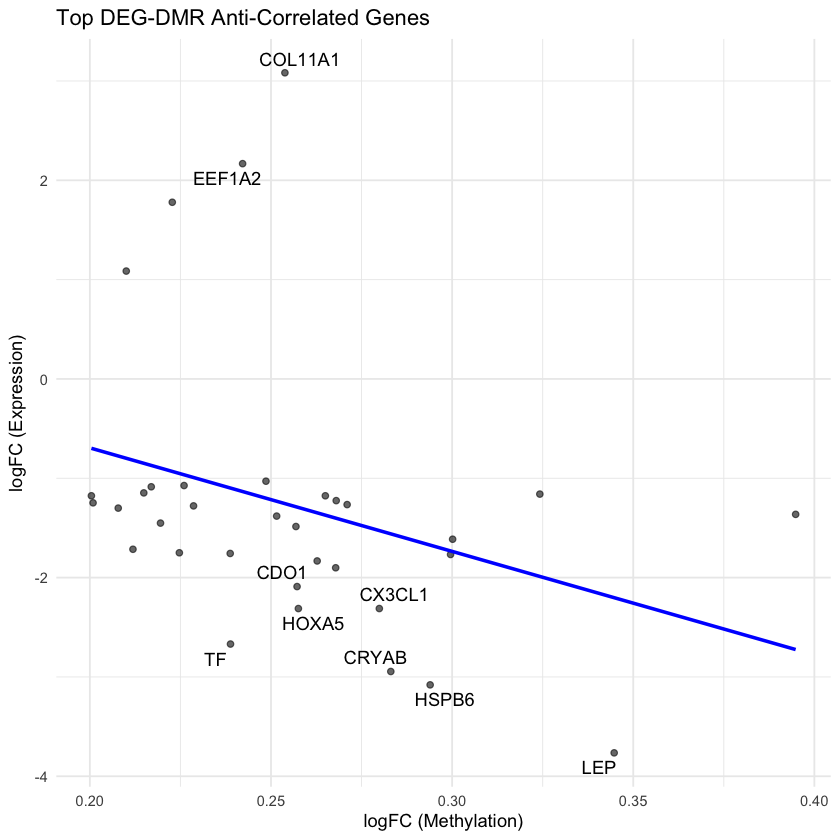

In [201]:
ggplot(deg_dmr_overlap, aes(x = logFC_meth, y = logFC_expr, label = Gene)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", color = "blue", se = FALSE) +
  geom_text_repel(data = subset(deg_dmr_overlap, abs(logFC_expr) > 2), max.overlaps = 10) +
  theme_minimal() +
  labs(
    title = "Top DEG-DMR Anti-Correlated Genes",
    x = "logFC (Methylation)",
    y = "logFC (Expression)"
  )
ggsave("results/DEG_DMR_correlation_plot.png", width = 10, height = 6, bg = "white")

Observed a statistically significant inverse relationship between promoter methylation and gene expression across overlapping DEGs and DMRs (Spearman ρ = -0.44, p = 0.0098), suggesting potential epigenetic silencing mechanisms in the tumor group.